In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [102]:
df=pd.read_csv(r"E:\OIBSIP\oibsip_taskno_5\Advertising.csv")

In [103]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [104]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [105]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [106]:
df.shape

(200, 4)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [108]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [109]:
a=df.corr()
a

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

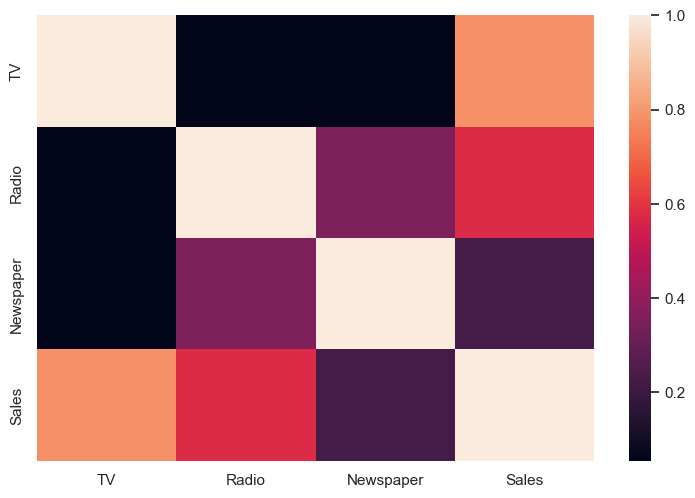

In [110]:
sns.heatmap(a)

In [111]:
df.duplicated().sum()

0

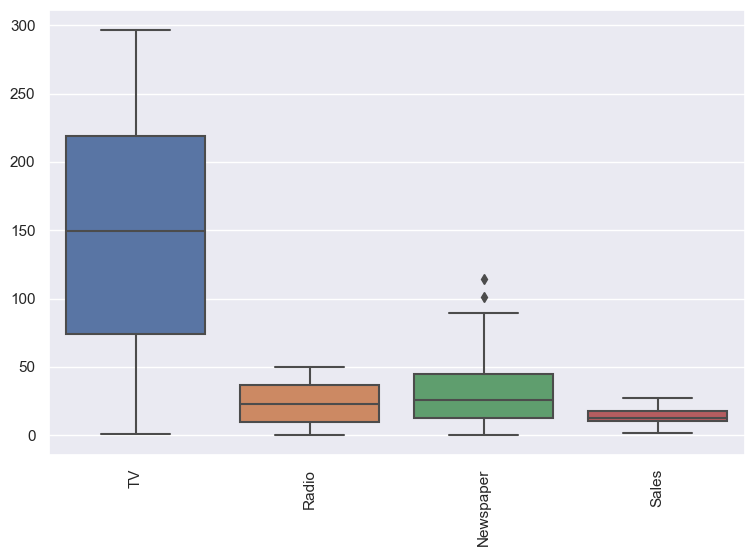

In [112]:
#melted_df = pd.melt(df)

sns.boxplot(data=df)
plt.xticks(rotation=90) 
plt.show()

In [113]:
from autoviz.AutoViz_Class import AutoViz_Class 
av=AutoViz_Class()

Shape of your Data Set loaded: (200, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nullpercent,NuniquePercent,dtype,Nuniques,Nulls,Least num. of categories,Data cleaning improvement suggestions
Unnamed: 0,0.000000,100.000000,int64,200,0,0,possible ID column: drop
TV,0.000000,95.000000,float64,190,0,0,
Radio,0.000000,83.500000,float64,167,0,0,
Newspaper,0.000000,86.000000,float64,172,0,0,


  Printing upto 30 columns max in each category:
    Numeric Columns : ['TV', 'Radio', 'Newspaper']
    Integer-Categorical Columns: []
    String-Categorical Columns: []
    Factor-Categorical Columns: []
    String-Boolean Columns: []
    Numeric-Boolean Columns: []
    Discrete String Columns: []
    NLP text Columns: []
    Date Time Columns: []
    ID Columns: ['Unnamed: 0']
    Columns that will not be considered in modeling: []
    4 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0']
   Columns to delete:
'   []'
   Boolean variables %s 
'   []'
   Categorical variables %s 
'   []'
   Continuous variables %s 
"   ['TV', 'Radio', 'Newspaper']"
   Discrete string variables %s 
'   []'
   Date and time variables %s 
'   []'
   ID variables %s 
"   ['Unnamed: 0']"
   Target variable %s 
'   Sales'
Number of All Scatter Plots = 6
All Plots are saved in .\AutoViz_Plots\Sales
Time to r

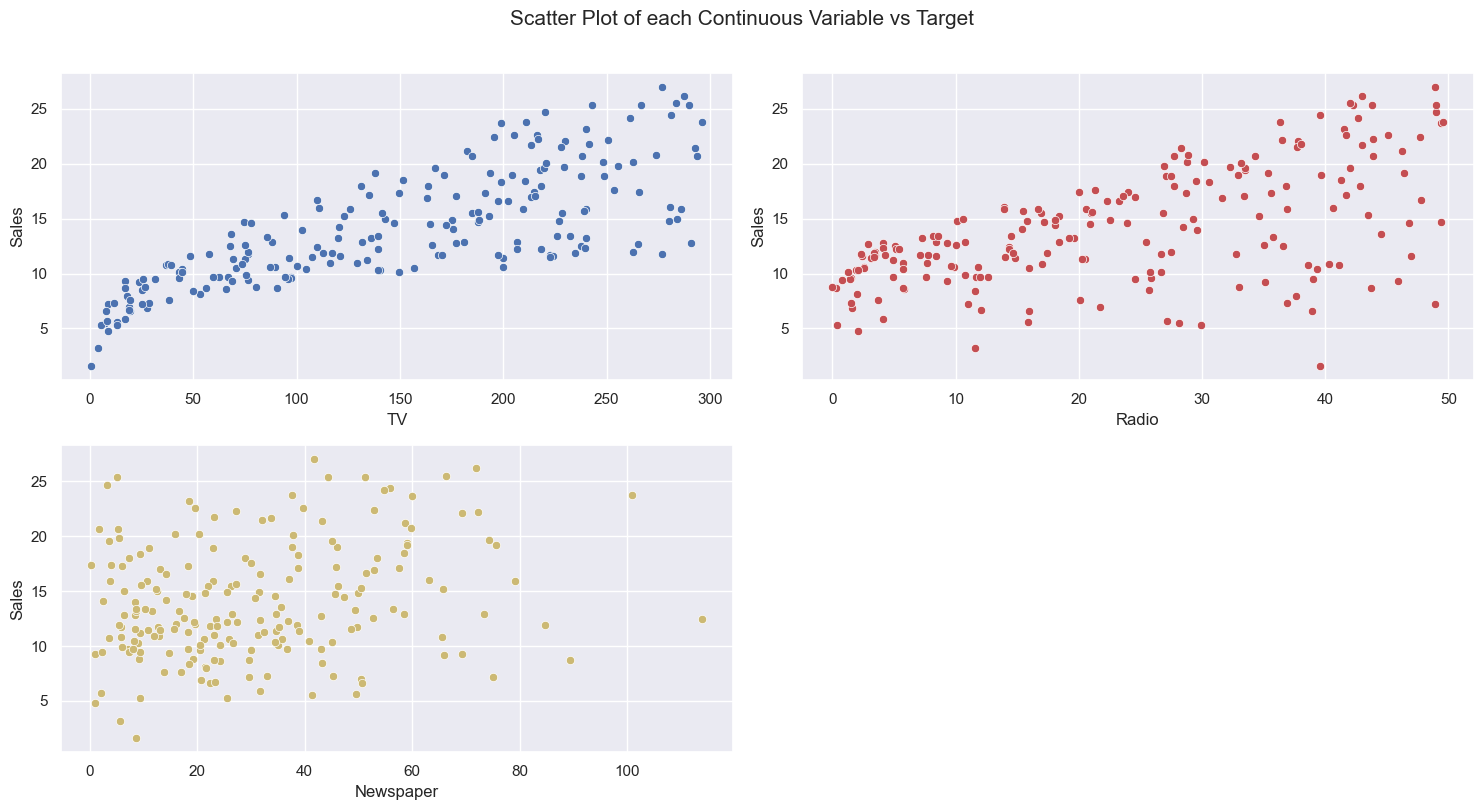

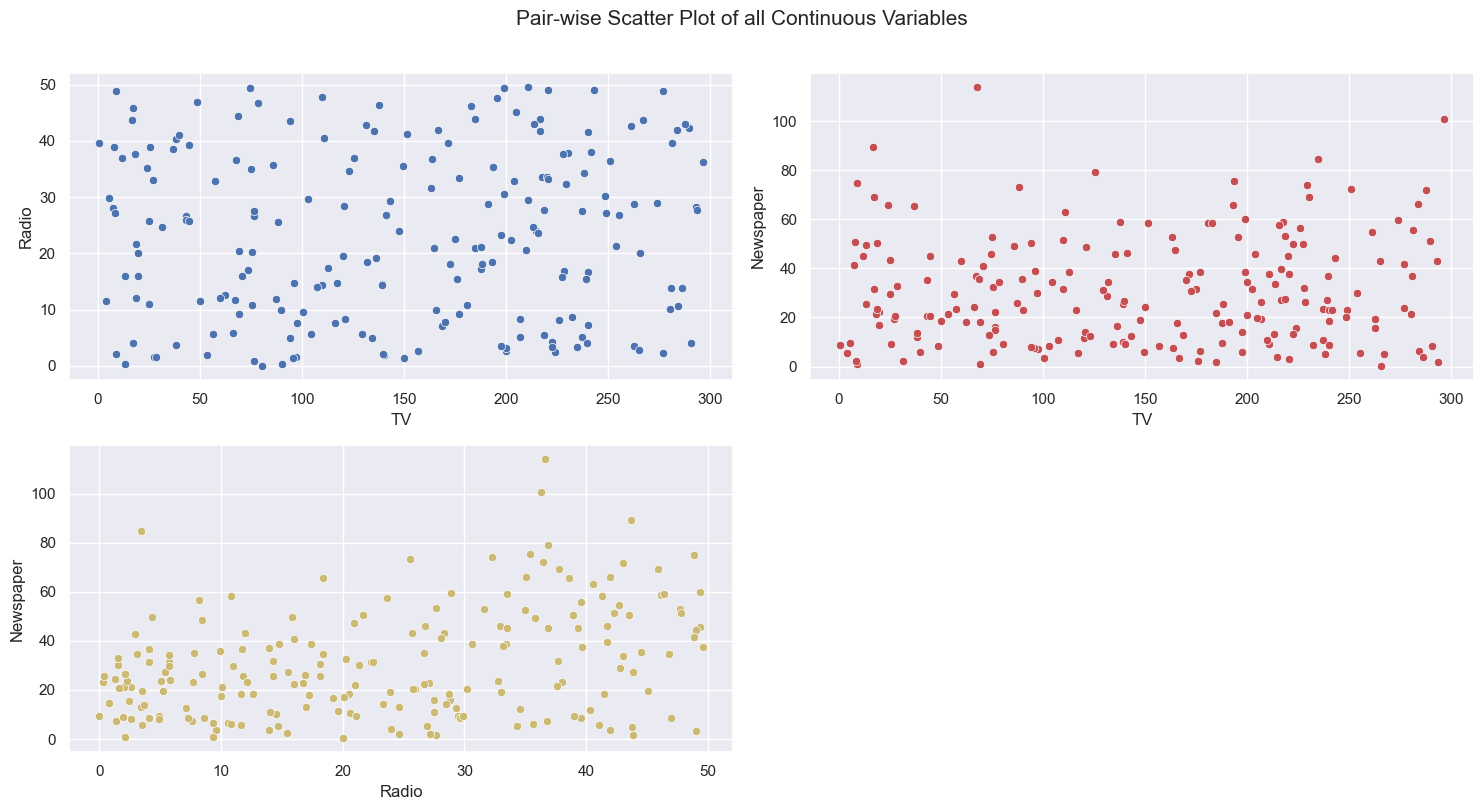

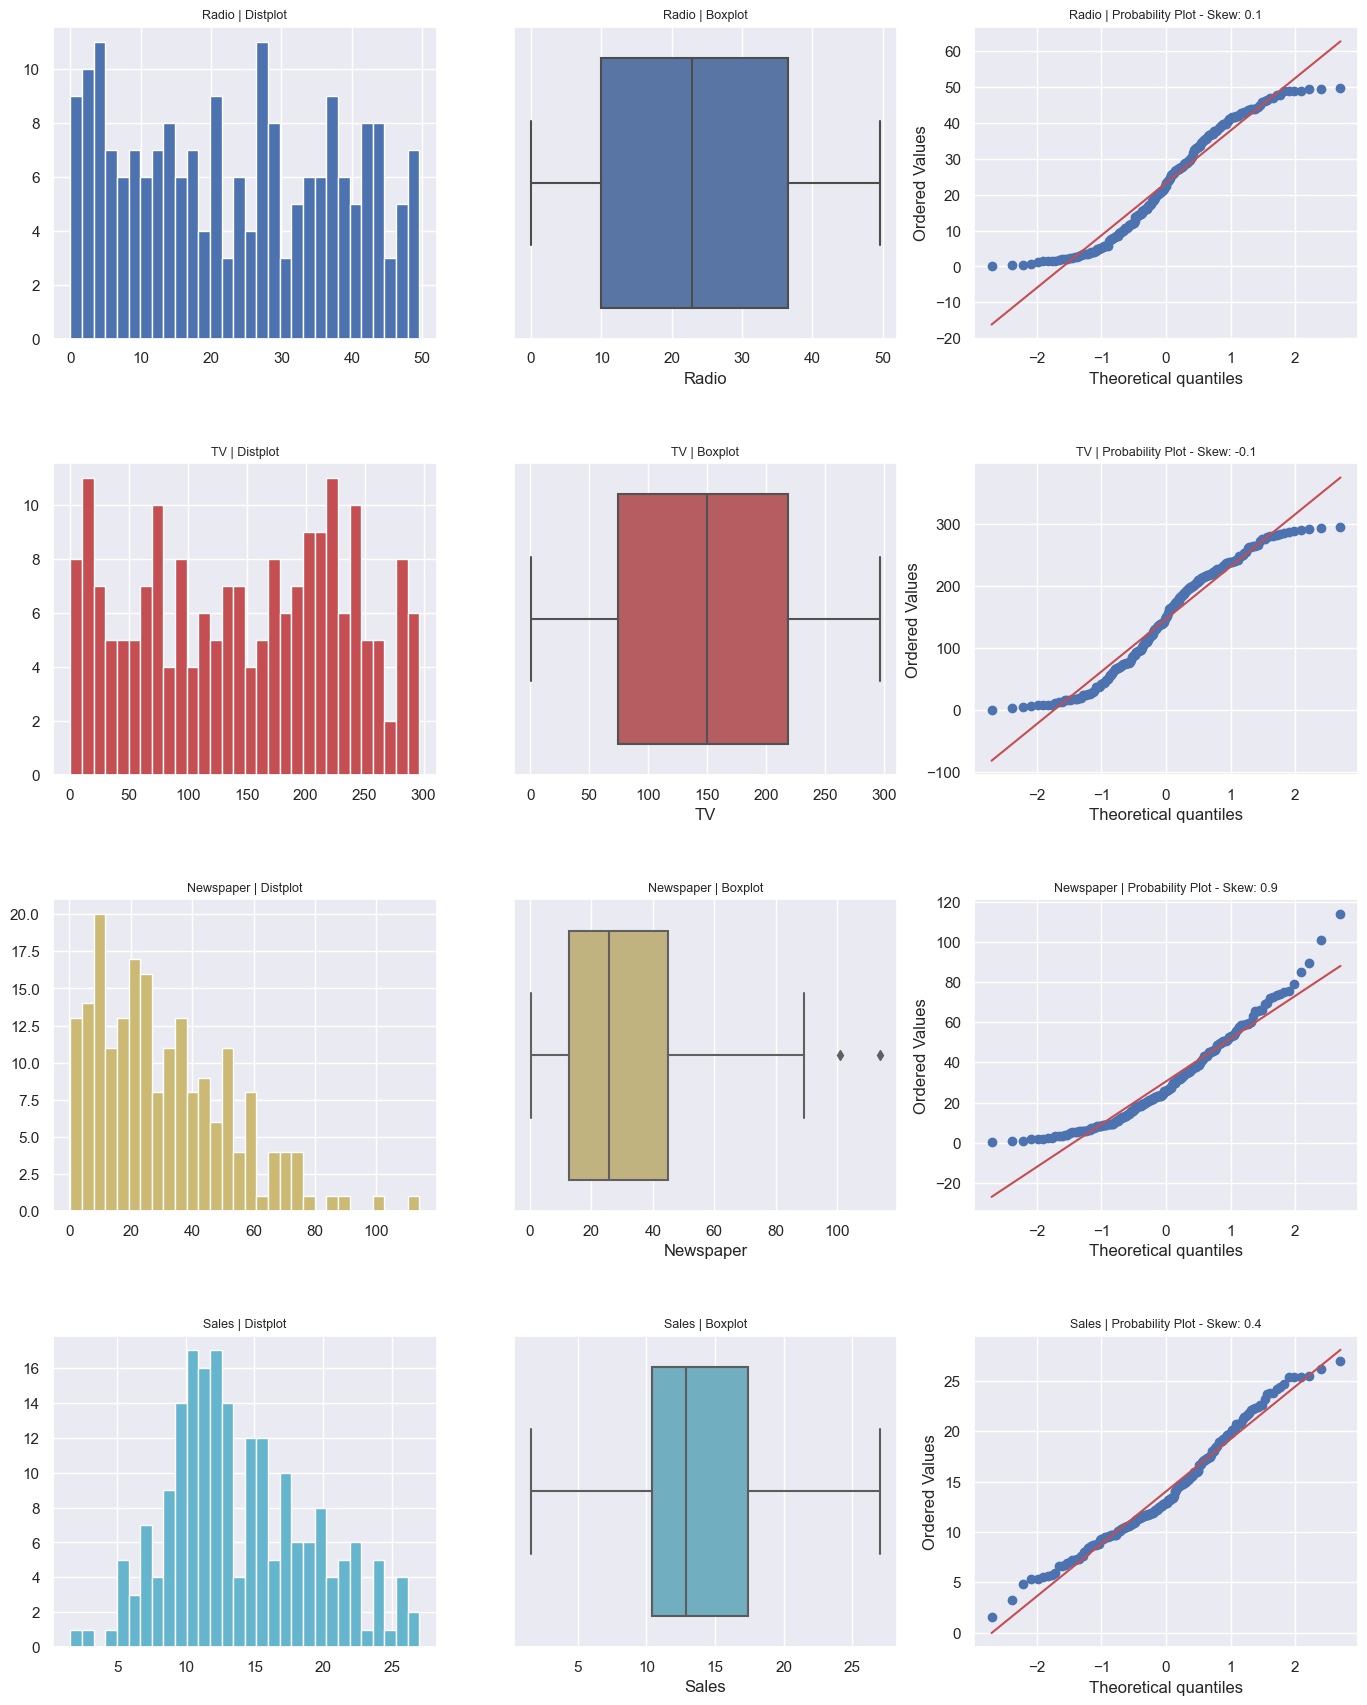

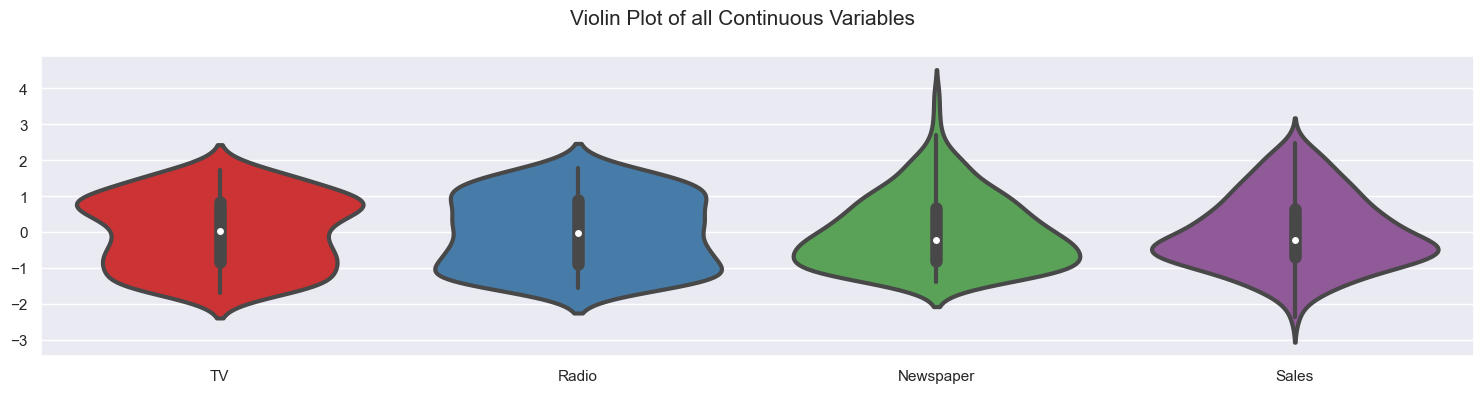

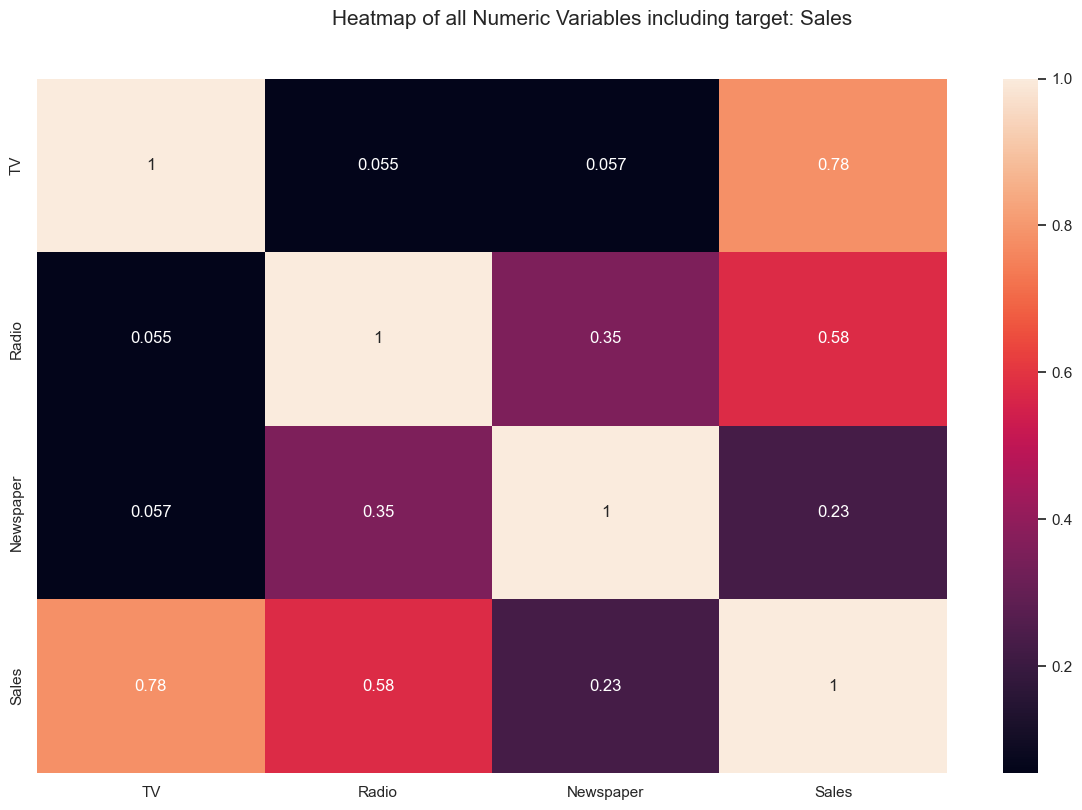

In [114]:
report = av.AutoViz(
    filename=r"E:\OIBSIP\oibsip_taskno_5\Advertising.csv",  # Optional: Provide a filename for saving the repor        # Provide your DataFrame here
    depVar="Sales",    # Optional: Specify the dependent variable (target variable)
    verbose=3   # Optional: Set the verbosity level (0, 1, or 2)
)

In [115]:
import sweetviz as sv

In [116]:
a=sv.analyze(df)

                                             |                                             | [  0%]   00:00 ->…

In [117]:
a.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [118]:
from feature_engine.outliers import Winsorizer

In [119]:
win_iqr=Winsorizer(capping_method="iqr",
                  tail="both",
                  fold=1.5,
                  variables=["Newspaper"])
df_win=win_iqr.fit_transform(df[['Newspaper']])

In [120]:
df["Newspaper"]=df_win['Newspaper']

In [121]:
skewness = df.skew()

print(skewness)

TV          -0.069853
Radio        0.094175
Newspaper    0.749830
Sales        0.407571
dtype: float64


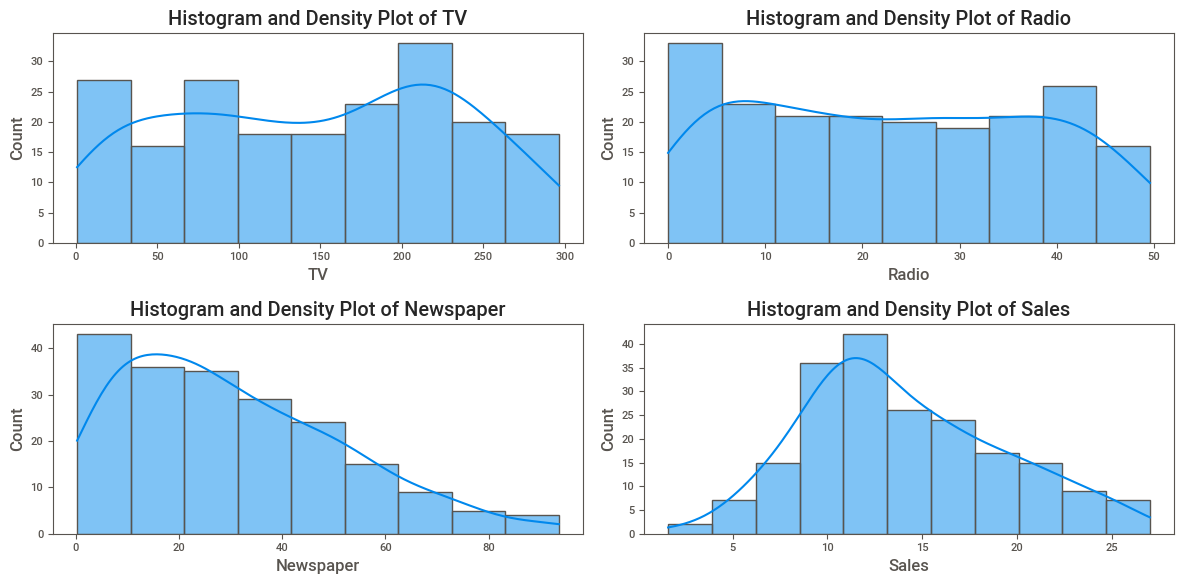

In [122]:
plt.figure(figsize=(12, 6))

# Create subplots for each column
for i, col in enumerate(df.columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram and Density Plot of {col}')
    plt.tight_layout()

plt.show()

In [123]:
kurtosis=df.kurt()
kurtosis

TV          -1.226495
Radio       -1.260401
Newspaper   -0.036720
Sales       -0.408869
dtype: float64

In [124]:
df['Newspaper'] = np.sqrt(df['Newspaper'])

In [125]:
skewness = df.skew()
print(skewness)

TV          -0.069853
Radio        0.094175
Newspaper    0.012135
Sales        0.407571
dtype: float64


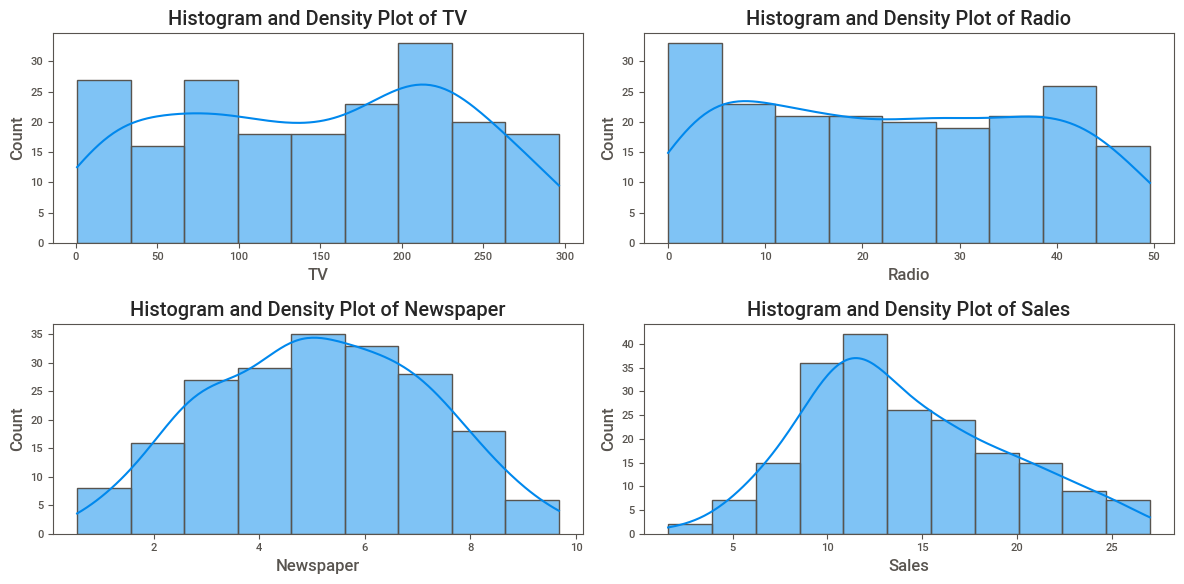

In [126]:
plt.figure(figsize=(12, 6))

# Create subplots for each column
for i, col in enumerate(df.columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram and Density Plot of {col}')
    plt.tight_layout()

plt.show()

In [127]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,8.318654,22.1
1,44.5,39.3,6.715653,10.4
2,17.2,45.9,8.324662,9.3
3,151.5,41.3,7.648529,18.5
4,180.8,10.8,7.641989,12.9


In [128]:
X = df.drop(columns="Sales",axis=1)

In [129]:
y=df["Sales"]

In [130]:
from sklearn.preprocessing import MinMaxScaler

In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [132]:
scaler = MinMaxScaler()
scaler.fit(X_train,y_train)

MinMaxScaler()

In [133]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [134]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso

models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso())
]

Linear Regression
Mean Squared Error: 3.171867153134636
R2 Score: 0.8995086814810295
Cross-Validation R2: 0.8597354368145549


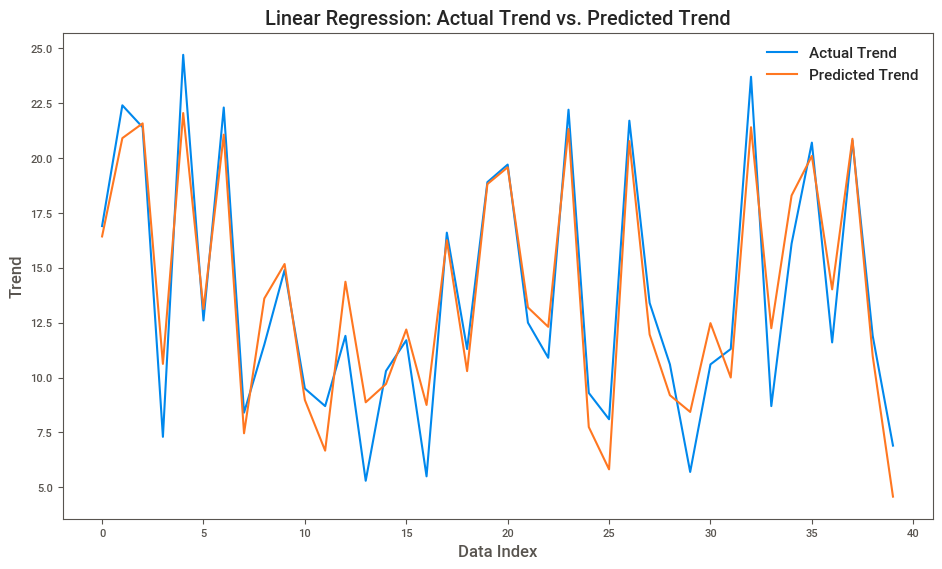


Ridge Regression
Mean Squared Error: 3.47040846379887
R2 Score: 0.8900502746523004
Cross-Validation R2: 0.8549269438808664


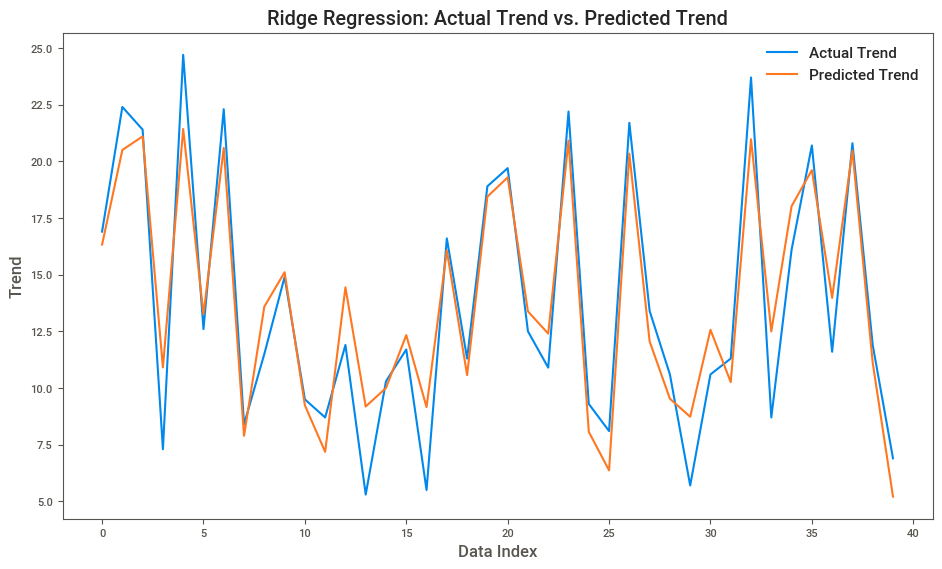


Lasso Regression
Mean Squared Error: 27.833508953208344
R2 Score: 0.11817680921684193
Cross-Validation R2: -0.07480543323377124


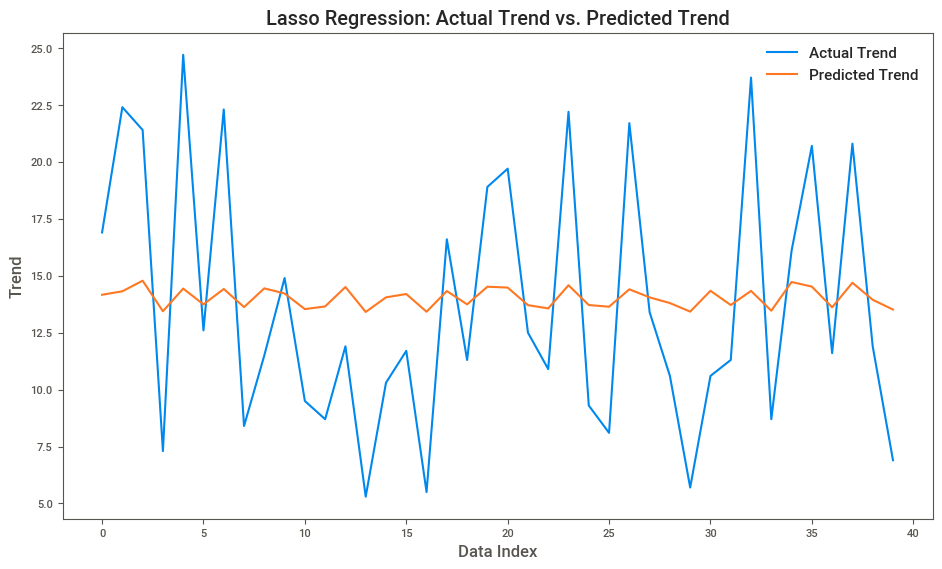

In [136]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

for name, model in models:
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    
    print("{}".format(name))
    print("Mean Squared Error: {}".format(mse))
    print("R2 Score: {}".format(r2))
    print("Cross-Validation R2: {}".format(cv_scores.mean()))
    
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend')
    plt.legend()
    plt.show()
    print()    

In [137]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [138]:
tv = float(input("Enter the TV value: "))
radio = float(input("Enter the Radio value: "))
news = float(input("Enter the Newspaper value: "))

new_data = pd.DataFrame({
    "TV": [tv],
    "Radio": [radio],
    "Newspaper": [news]
})

new_pred_scaled = scaler.transform(new_data)
print("-------------------------------------")
new_pred = lr.predict(new_pred_scaled)
print("Predicted Sales : {}".format(abs(new_pred)))

Enter the TV value: 12
Enter the Radio value: 15
Enter the Newspaper value: 20
-------------------------------------
Predicted Sales : [3.00666687]
